In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datosreales/DatosReales.csv
/kaggle/input/datasetheartdisease/dataset.csv


# Visualización inicial de los datos

In [2]:
data=pd.read_csv("/kaggle/input/datasetheartdisease/dataset.csv")
df=data.copy()
df=df.drop(["Unnamed: 0"],axis=1)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,8,17,1,1,5,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,8,22,0,1,5,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,9,19,1,1,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,8,21,0,0,4,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,8,14,0,1,5,8.0,0,0,0


# Separamos los datos
Separamos los datos de nuestro dataset, ponemos las características que vamos a utilizar para entrenar en la variable X y la variable a predecir en la varibale Y.

In [3]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

# Función Selección de características
Función utilizada para declarar Sequential Feature Selector con la cantidad de caracteristicas a selecciona y el modelo que va a utilizar

In [4]:
def select_features(model,n_features,fwd):
    sfs=SFS(
        model,
        k_features=n_features,
        forward=fwd,
        scoring='accuracy',
        cv=0
    )
    return sfs

# Estandarización de los datos
Usamos StandardScaler para estandarizar las caracteríticas que vamos a usar para entrenar en nuestro modelo.

In [5]:
scaler=StandardScaler()
columns=X.columns
s=scaler.fit_transform(X)

scaled_data=pd.DataFrame(s,columns=columns)
scaled_data.head(5)
scaled_data.shape

(319795, 16)

# Selección de caracteríticas
Se declara la función train_select_features que lo que hace es por medio de StratifiedKFold y un array con la cantidad de caracteríticas a seleccionar, entrena un modelo y guardar el rendimiento en un dataframe para luego seleccionar con que y cuales caracteríticas tuvo mejor rendimieto el modelo.

In [6]:
def train_select_features(model,folds,features):
    skf=StratifiedKFold(n_splits=folds)
    resultados=pd.DataFrame()
    idx=0
    resultados = {
        'Modelo': [],
        'Features':[],
        'Name Features':[],
        'Index Features':[],
        'Error':[],
        'Tiempo':[]
    }
    for feature in features:
        for train, test in skf.split(X=scaled_data,y=Y):
            tiempo_i = time.time()
            Xtrain, Xtest = scaled_data.iloc[train], scaled_data.iloc[test]
            Ytrain, Ytest = Y[train], Y[test]
            
            model_train=select_features(model,feature,False)
            model_train.fit(Xtrain,Ytrain)
            tiempo_f = time.time()
            resultados['Modelo'].append(str(model))
            resultados['Name Features'].append(model_train.k_feature_names_)
            resultados['Index Features'].append(model_train.k_feature_idx_)
            resultados['Features'].append(feature)
            resultados['Error'].append(1-model_train.k_score_)
            resultados['Tiempo'].append(tiempo_f-tiempo_i)



    return resultados


In [7]:
features=[4,6,10,12]
resultados=train_select_features(QuadraticDiscriminantAnalysis(),5,features)
resultados= pd.DataFrame.from_dict(resultados, orient='index')
resultados=resultados.transpose()
resultados

,Modelo,Features,Name Features,Index Features,Error,Tiempo
0,QuadraticDiscriminantAnalysis(),4,"(Smoking, AlcoholDrinking, Sex, AgeCategory)","(1, 2, 7, 8)",0.085598,47.445546
1,QuadraticDiscriminantAnalysis(),4,"(Smoking, AlcoholDrinking, Sex, AgeCategory)","(1, 2, 7, 8)",0.085598,47.778944
2,QuadraticDiscriminantAnalysis(),4,"(Smoking, AlcoholDrinking, Sex, AgeCategory)","(1, 2, 7, 8)",0.085594,46.663033
3,QuadraticDiscriminantAnalysis(),4,"(Smoking, AlcoholDrinking, Sex, AgeCategory)","(1, 2, 7, 8)",0.085594,47.529659
4,QuadraticDiscriminantAnalysis(),4,"(Smoking, AlcoholDrinking, Sex, AgeCategory)","(1, 2, 7, 8)",0.085594,47.123643
5,QuadraticDiscriminantAnalysis(),6,"(BMI, Smoking, AlcoholDrinking, Sex, AgeCatego...","(0, 1, 2, 7, 8, 10)",0.087341,45.370941
6,QuadraticDiscriminantAnalysis(),6,"(BMI, Smoking, AlcoholDrinking, Sex, AgeCatego...","(0, 1, 2, 7, 8, 10)",0.087439,45.406306
7,QuadraticDiscriminantAnalysis(),6,"(BMI, Smoking, AlcoholDrinking, Sex, AgeCatego...","(0, 1, 2, 7, 8, 10)",0.087474,45.527244
8,QuadraticDiscriminantAnalysis(),6,"(BMI, Smoking, AlcoholDrinking, Sex, AgeCatego...","(0, 1, 2, 7, 8, 10)",0.08763,45.799781
9,QuadraticDiscriminantAnalysis(),6,"(BMI, Smoking, AlcoholDrinking, Sex, AgeCatego...","(0, 1, 2, 7, 8, 10)",0.087599,45.899453


# Gráfica de los resultados obtenidos

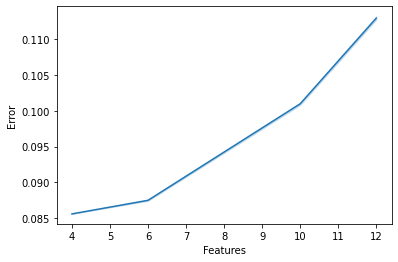

In [8]:
sns.lineplot(data=resultados,x="Features",y="Error")
plt.show()

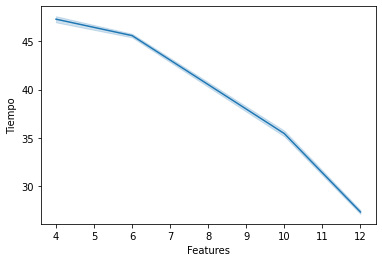

In [9]:
sns.lineplot(data=resultados,x="Features",y="Tiempo")
plt.show()

In [10]:
resultados.sort_values(by ='Error', ascending =True).head(10)

,Modelo,Features,Name Features,Index Features,Error,Tiempo
2,QuadraticDiscriminantAnalysis(),4,"(Smoking, AlcoholDrinking, Sex, AgeCategory)","(1, 2, 7, 8)",0.085594,46.663033
3,QuadraticDiscriminantAnalysis(),4,"(Smoking, AlcoholDrinking, Sex, AgeCategory)","(1, 2, 7, 8)",0.085594,47.529659
4,QuadraticDiscriminantAnalysis(),4,"(Smoking, AlcoholDrinking, Sex, AgeCategory)","(1, 2, 7, 8)",0.085594,47.123643
0,QuadraticDiscriminantAnalysis(),4,"(Smoking, AlcoholDrinking, Sex, AgeCategory)","(1, 2, 7, 8)",0.085598,47.445546
1,QuadraticDiscriminantAnalysis(),4,"(Smoking, AlcoholDrinking, Sex, AgeCategory)","(1, 2, 7, 8)",0.085598,47.778944
5,QuadraticDiscriminantAnalysis(),6,"(BMI, Smoking, AlcoholDrinking, Sex, AgeCatego...","(0, 1, 2, 7, 8, 10)",0.087341,45.370941
6,QuadraticDiscriminantAnalysis(),6,"(BMI, Smoking, AlcoholDrinking, Sex, AgeCatego...","(0, 1, 2, 7, 8, 10)",0.087439,45.406306
7,QuadraticDiscriminantAnalysis(),6,"(BMI, Smoking, AlcoholDrinking, Sex, AgeCatego...","(0, 1, 2, 7, 8, 10)",0.087474,45.527244
9,QuadraticDiscriminantAnalysis(),6,"(BMI, Smoking, AlcoholDrinking, Sex, AgeCatego...","(0, 1, 2, 7, 8, 10)",0.087599,45.899453
8,QuadraticDiscriminantAnalysis(),6,"(BMI, Smoking, AlcoholDrinking, Sex, AgeCatego...","(0, 1, 2, 7, 8, 10)",0.08763,45.799781


In [11]:
resultados.sort_values(by ='Tiempo', ascending =True).head(10)

,Modelo,Features,Name Features,Index Features,Error,Tiempo
18,QuadraticDiscriminantAnalysis(),12,"(BMI, Smoking, AlcoholDrinking, Stroke, Mental...","(0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13)",0.112748,27.019441
15,QuadraticDiscriminantAnalysis(),12,"(BMI, Smoking, AlcoholDrinking, Stroke, Mental...","(0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13)",0.112721,27.131002
16,QuadraticDiscriminantAnalysis(),12,"(BMI, Smoking, AlcoholDrinking, Stroke, Mental...","(0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13)",0.112811,27.149978
17,QuadraticDiscriminantAnalysis(),12,"(BMI, Smoking, AlcoholDrinking, Stroke, Mental...","(0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13)",0.113065,27.570124
19,QuadraticDiscriminantAnalysis(),12,"(BMI, Smoking, AlcoholDrinking, Stroke, Mental...","(0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13)",0.11344,27.585593
12,QuadraticDiscriminantAnalysis(),10,"(BMI, Smoking, AlcoholDrinking, Stroke, Mental...","(0, 1, 2, 3, 5, 7, 8, 10, 11, 13)",0.101221,35.03987
10,QuadraticDiscriminantAnalysis(),10,"(BMI, Smoking, AlcoholDrinking, Stroke, Mental...","(0, 1, 2, 3, 5, 7, 8, 10, 11, 13)",0.10076,35.050506
14,QuadraticDiscriminantAnalysis(),10,"(BMI, Smoking, AlcoholDrinking, Stroke, Mental...","(0, 1, 2, 3, 5, 7, 8, 10, 11, 13)",0.10119,35.516068
13,QuadraticDiscriminantAnalysis(),10,"(BMI, Smoking, AlcoholDrinking, Stroke, Mental...","(0, 1, 2, 3, 5, 7, 8, 10, 11, 13)",0.100826,35.557399
11,QuadraticDiscriminantAnalysis(),10,"(BMI, Smoking, AlcoholDrinking, Stroke, Mental...","(0, 1, 2, 3, 5, 7, 8, 10, 11, 13)",0.10092,35.995445


# Función para el entrenamiento de los modelos

In [12]:
def entrenarModelo(model, Xtrain,Ytrain,Xtest,Ytest,Xreal,Yreal):
    model.fit(X=Xtrain,y=Ytrain)
    Ypred=model.predict(Xtest)
    ## Rendimiento del entrenamiento del modelo
    print("#####################Rendimiento después del entrenamiento#########################")
    print(f'Model: {str(model)}')
    print(f'Accuracy Score: {accuracy_score(Ytest,Ypred)}')
    print(f'Precission Score: {precision_score(Ytest,Ypred)}')
    print(f'Recall Score: {recall_score(Ytest,Ypred)}')
    print(f'F1-Score: {f1_score(Ytest,Ypred)}')
    ## Rendimiento del modelo con los datos reales
    print("######################Rendimiento con los datos reales##############################")
    y_pred=model.predict(Xreal)
    print("Accuracy:",accuracy_score(Yreal, y_pred))
    print(f'Precission Score: {precision_score(Yreal,y_pred)}')
    print(f'Recall Score: {recall_score(Yreal,y_pred)}')
    print(f'F1-Score: {f1_score(Yreal,y_pred)}')

# Función para seleccionar la data
Esta función se encarga de extraer del dataframe original las caracteríticas seleccionadas a través de sus índices, para luego entrenar el modelo solo con esas caracteríticas seleccionadas

In [13]:
def select_data(data,index):
    return data.iloc[:,index]

# Función para particionar los datos
Partimos los datos en train y test en una proporción 70-30. 70% de los datos para entrenar el modelo y 30% de los datos para la validación del mismo.

In [14]:
def split_data(X,Y):
    return train_test_split(X,Y,test_size=0.3,random_state=50)

# Cargamos la data real

In [15]:
data_real=pd.read_csv('/kaggle/input/datosreales/DatosReales.csv')
data_real.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,"19,7",0,0,0,0,0,0,8,10,0,0,5,6,0,0,0
1,0,"22,8",0,0,0,0,0,0,8,10,0,1,5,6,1,0,0
2,1,"28,8",1,0,1,25,28,1,9,20,1,0,3,9,0,1,0
3,0,23,0,0,0,0,0,0,9,10,0,0,6,6,0,0,0
4,1,"32,4",0,1,1,30,15,1,8,18,1,0,4,4,1,1,1


In [16]:
X_real=data_real.iloc[:,1:]
Y_real=data_real.iloc[:,0]
X_real["BMI"] = encoder.fit_transform(X_real["BMI"])

# Entrenamiento del modelo con 4 características seleccionadas

In [17]:
selected_data=select_data(scaled_data,np.array(resultados["Index Features"][0]))
selected_data.head()

,Smoking,AlcoholDrinking,Sex,AgeCategory
0,1.193474,-0.27032,-0.951711,0.136184
1,-0.837890,-0.27032,-0.951711,1.538806
2,1.193474,-0.27032,1.050739,0.697233
3,-0.837890,-0.27032,-0.951711,1.258282
4,-0.837890,-0.27032,-0.951711,-0.705388


In [18]:
X_train,X_test,y_train,y_test=split_data(selected_data,Y)

In [19]:
X_real_seleccionada=select_data(X_real,np.array(resultados["Index Features"][0]))

In [20]:
entrenarModelo(QuadraticDiscriminantAnalysis(),X_train,y_train,X_test,y_test,X_real_seleccionada,Y_real)

#####################Rendimiento después del entrenamiento#########################
Model: QuadraticDiscriminantAnalysis()
Accuracy Score: 0.9151439977485694
Precission Score: 0.0
Recall Score: 0.0
F1-Score: 0.0
######################Rendimiento con los datos reales##############################
Accuracy: 0.5333333333333333
Precission Score: 0.0
Recall Score: 0.0
F1-Score: 0.0


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Entrenamiento del modelo con 6 características seleccionadas

In [21]:
selected_data=select_data(scaled_data,np.array(resultados["Index Features"][5]))
selected_data.head()

,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory,PhysicalActivity
0,-1.844750,1.193474,-0.27032,-0.951711,0.136184,0.538256
1,-1.256338,-0.837890,-0.27032,-0.951711,1.538806,0.538256
2,-0.274603,1.193474,-0.27032,1.050739,0.697233,0.538256
3,-0.647473,-0.837890,-0.27032,-0.951711,1.258282,-1.857852
4,-0.726138,-0.837890,-0.27032,-0.951711,-0.705388,0.538256


In [22]:
X_train,X_test,y_train,y_test=split_data(selected_data,Y)

In [23]:
X_real_seleccionada=select_data(X_real,np.array(resultados["Index Features"][5]))

In [24]:
entrenarModelo(QuadraticDiscriminantAnalysis(),X_train,y_train,X_test,y_test,X_real_seleccionada,Y_real)

#####################Rendimiento después del entrenamiento#########################
Model: QuadraticDiscriminantAnalysis()
Accuracy Score: 0.9124235191111019
Precission Score: 0.2698412698412698
Recall Score: 0.018793759980346395
F1-Score: 0.03514010105649977
######################Rendimiento con los datos reales##############################
Accuracy: 0.5333333333333333
Precission Score: 0.0
Recall Score: 0.0
F1-Score: 0.0


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Entrenamiento del modelo con 10 características seleccionadas

In [25]:
selected_data=select_data(scaled_data,np.array(resultados["Index Features"][10]))
selected_data.head()

,BMI,Smoking,AlcoholDrinking,Stroke,MentalHealth,Sex,AgeCategory,PhysicalActivity,GenHealth,Asthma
0,-1.844750,1.193474,-0.27032,-0.198040,3.281069,-0.951711,0.136184,0.538256,0.388307,2.541515
1,-1.256338,-0.837890,-0.27032,5.049478,-0.490039,-0.951711,1.538806,0.538256,0.388307,-0.393466
2,-0.274603,1.193474,-0.27032,-0.198040,3.281069,1.050739,0.697233,0.538256,-1.529392,2.541515
3,-0.647473,-0.837890,-0.27032,-0.198040,-0.490039,-0.951711,1.258282,-1.857852,-0.570542,-0.393466
4,-0.726138,-0.837890,-0.27032,-0.198040,-0.490039,-0.951711,-0.705388,0.538256,0.388307,-0.393466


In [26]:
X_train,X_test,y_train,y_test=split_data(selected_data,Y)

In [27]:
X_real_seleccionada=select_data(X_real,np.array(resultados["Index Features"][10]))

In [28]:
entrenarModelo(QuadraticDiscriminantAnalysis(),X_train,y_train,X_test,y_test,X_real_seleccionada,Y_real)

#####################Rendimiento después del entrenamiento#########################
Model: QuadraticDiscriminantAnalysis()
Accuracy Score: 0.8989670519809462
Precission Score: 0.3468823993685872
Recall Score: 0.21594398722515662
F1-Score: 0.2661821485350897
######################Rendimiento con los datos reales##############################
Accuracy: 0.5333333333333333
Precission Score: 0.0
Recall Score: 0.0
F1-Score: 0.0


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Entrenamiento del modelo con 12 características seleccionadas

In [29]:
selected_data=select_data(scaled_data,np.array(resultados["Index Features"][15]))
selected_data.head()

,BMI,Smoking,AlcoholDrinking,Stroke,MentalHealth,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma
0,-1.844750,1.193474,-0.27032,-0.198040,3.281069,-0.951711,0.136184,2.524911,0.538256,0.388307,-1.460354,2.541515
1,-1.256338,-0.837890,-0.27032,5.049478,-0.490039,-0.951711,1.538806,-0.396054,0.538256,0.388307,-0.067601,-0.393466
2,-0.274603,1.193474,-0.27032,-0.198040,3.281069,1.050739,0.697233,2.524911,0.538256,-1.529392,0.628776,2.541515
3,-0.647473,-0.837890,-0.27032,-0.198040,-0.490039,-0.951711,1.258282,-0.396054,-1.857852,-0.570542,-0.763977,-0.393466
4,-0.726138,-0.837890,-0.27032,-0.198040,-0.490039,-0.951711,-0.705388,-0.396054,0.538256,0.388307,0.628776,-0.393466


In [30]:
X_train,X_test,y_train,y_test=split_data(selected_data,Y)

In [31]:
X_real_seleccionada=select_data(X_real,np.array(resultados["Index Features"][15]))

In [32]:
entrenarModelo(QuadraticDiscriminantAnalysis(),X_train,y_train,X_test,y_test,X_real_seleccionada,Y_real)

#####################Rendimiento después del entrenamiento#########################
Model: QuadraticDiscriminantAnalysis()
Accuracy Score: 0.8863652946142861
Precission Score: 0.3252310419040385
Recall Score: 0.31556319862424764
F1-Score: 0.3203241895261846
######################Rendimiento con los datos reales##############################
Accuracy: 0.5333333333333333
Precission Score: 0.0
Recall Score: 0.0
F1-Score: 0.0


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
